In [1]:
from lvmtipo.actors import lvm

await lvm.sci.agc.start()

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000149.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000163.fits


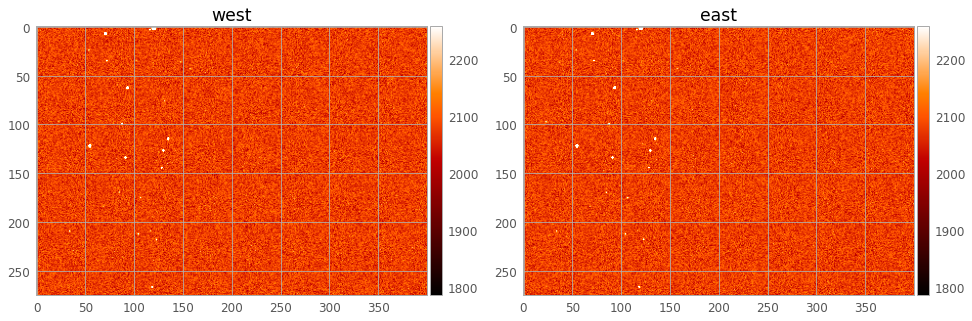

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000150.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000164.fits


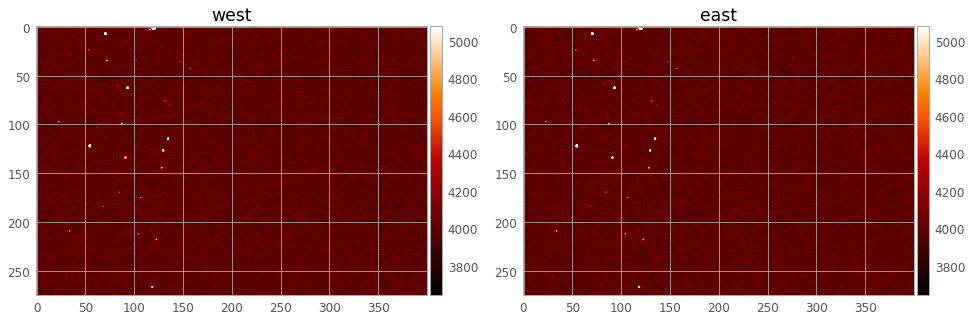

In [13]:
%matplotlib inline
from plotimg import plot_images, fits

for e in [1.,5.]:
    ef, wf = (await lvm.sci.agc.expose(e)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

In [14]:
await lvm.sci.foc.start()

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000151.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000165.fits


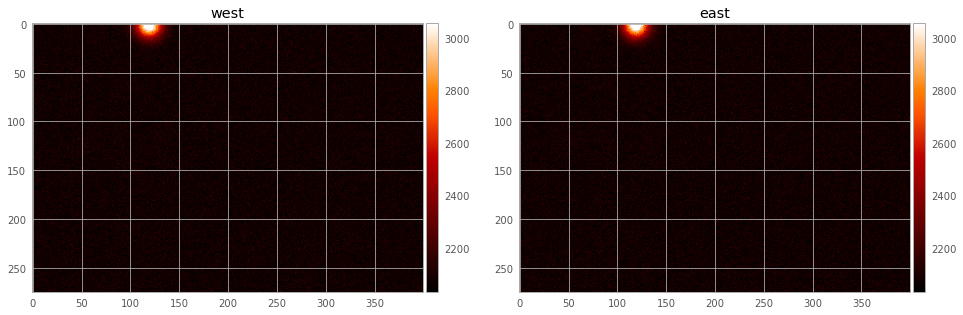

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000152.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000166.fits


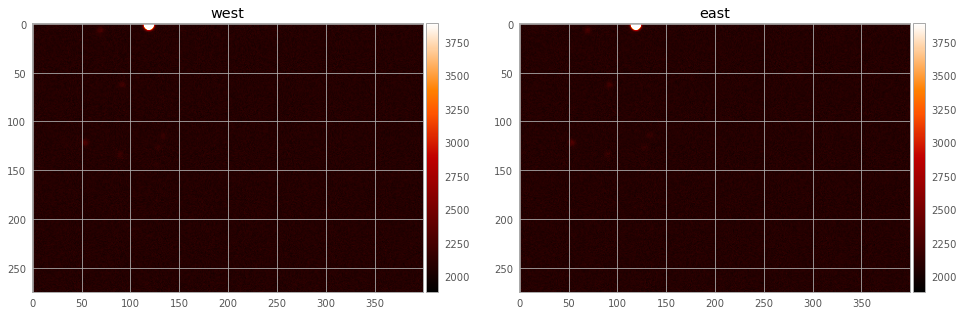

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000153.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000167.fits


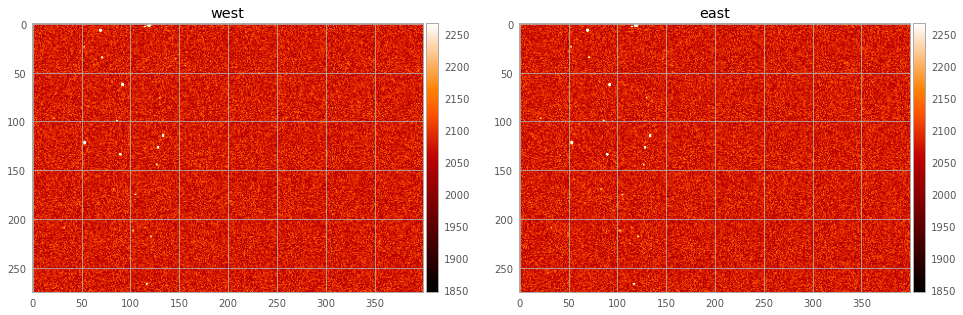

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000154.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000168.fits


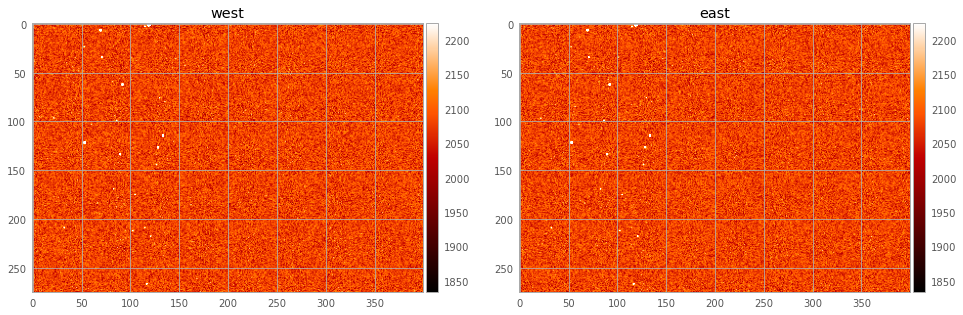

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000155.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000169.fits


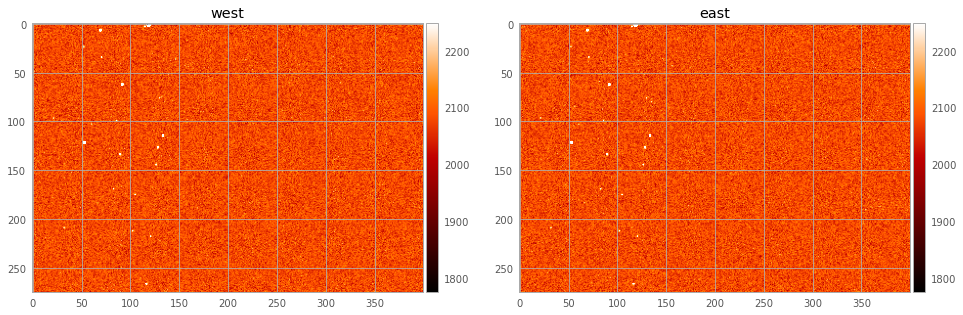

east: /data/lvm/sci/agcam/east/20220624/lvm.sci.agcam.east_00000156.fits, west: /data/lvm/sci/agcam/west/20220624/lvm.sci.agcam.west_00000170.fits


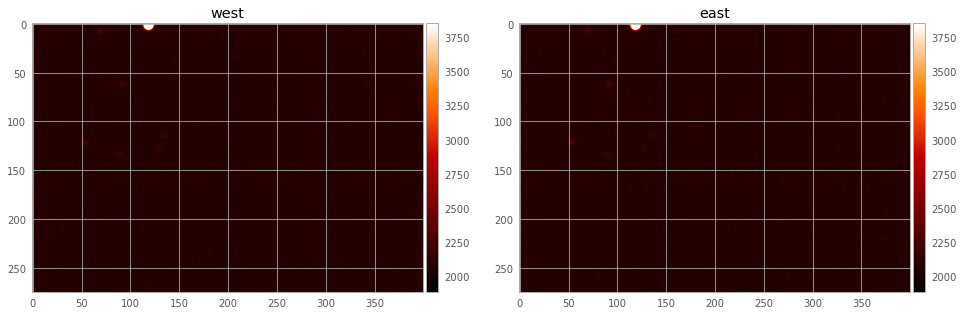

{'Reachable': True,
 'AtHome': True,
 'Moving': False,
 'PositionSwitchStatus': 254,
 'Position': 0.0,
 'DeviceEncoder': {'Position': 0.0, 'Unit': 'STEPS'},
 'Velocity': 0.0,
 'AtLimit': False}

In [15]:
%matplotlib inline

for p in [600, 300, 100, 0, -100, -300]:
    await lvm.sci.foc.moveAbsolute(p)
    ef, wf = (await lvm.sci.agc.expose(1)).flatten().unpack("east.filename", "west.filename") 
    print(f"east: {ef}, west: {wf}")
    plot_images(fits.getdata(ef, ext=0), fits.getdata(wf, ext=0))

await lvm.sci.foc.moveToHome()